# 📍회귀 분석

: '데이터는 거짓말을 하지 않는다'
- 숨겨진 진실을 밝히는 분석 방법 중 하나

- 변수들 사이의 연관성을 파악하고 예측 모델을 만든다
ex. 기업의 광고 지출과 판매량 사이의 관계를 분석

- 단순 선형 회귀 부터 다중 회귀 분석까지 다양한 형태로 발전해옴

## 😈 데이터 설명
🎧 Song Popularity Dataset

👉 설명
- 특정한 요인에 따라 노래와 인기를 이해하기 위한 여러 연구가 수행됨.
- 이러한 노래 샘플들은 세분화되어 있으며 해당 매개변수는 표로 기록됨. 
- 데이터세트는 크고 다중 공선성이 강하기 때문에 복잡성이 발생.

👉 주요 목표
에너지, 음향, 악기성, 생동감, 춤성 등을 기반으로 .. "노래 인기 예측"


리뷰에 참고한 코드: 
https://www.kaggle.com/code/logankeener/song-popularity-predictive-model

👾 Download packages libraries

In [43]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

import os
for dirname, _, filenames in os.walk(r'N:\Algorithm Study\WEEK15\archive (4)\song_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [44]:
song_data = pd.read_csv(r"N:\Algorithm Study\WEEK15\archive (4)\song_data.csv")
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [45]:
df = pd.DataFrame(song_data)

# 지표 해석을 해보자
# Translating the feature descriptions into Korean and creating a DataFrame

feature_descriptions_korean = {
    "Feature": [
        "Song Duration", "Acousticness", "Danceability", "Energy", 
        "Instrumentalness", "Key", "Liveness", "Loudness", 
        "Mode", "Speechiness", "Tempo", "Time Signature", "Valence", "Song Popularity"
    ],
    "Description (Korean)": [
        "노래의 길이 (밀리초 단위)", 
        "트랙이 어쿠스틱한지 여부를 나타내는 신뢰도 (0.0에서 1.0 사이)",
        "템포, 리듬 안정성, 비트 강도 및 전반적인 규칙성을 포함하여 춤추기에 적합한 트랙을 설명 (0.0이 가장 춤추기 어렵고, 1.0이 가장 적합)",
        "강도와 활동의 지각적 측정을 나타내며, 에너지가 높은 트랙은 빠르고 크고 시끄러운 느낌을 줌",
        "트랙에서 보컬의 부재를 나타내며, 악기만으로 이루어진 노래는 1의 값을 가짐",
        "트랙의 전체 조를 정수로 나타내며 표준 피치 클래스 표기법을 사용하여 매핑 가능",
        "트랙이 청중 앞에서 라이브로 수행될 확률을 나타냄",
        "데시벨(dB) 단위로 트랙의 상대적 음량을 나타내며, 값은 -60에서 0 dB 사이에서 변함",
        "트랙의 모드(장조 또는 단조)를 나타내며, 장조는 1로, 단조는 0으로 표시됨",
        "트랙에서 말의 존재를 측정하며, 팟캐스트 또는 오디오북의 녹음은 거의 1.0 값을 가짐",
        "분당 비트 수(BPM)로 트랙의 전체 추정 템포를 나타냄",
        "트랙의 추정 전체 박자를 나타냄. 박자(메터)는 각 바(또는 마디)에 몇 개의 비트가 있는지를 명시하는 노테이션 규칙",
        "트랙에서 전달되는 음악적 긍정성을 0.0에서 1.0 사이의 척도로 설명. 높은 발란스를 가진 트랙은 보다 긍정적인 느낌(예: 행복, 쾌활, 황홀)을 줌",
        "곡의 인기도를 나타냄. 값이 1이면 인기 있는 곡, 0이면 인기 없는 곡을 의미"
    ]
}

feature_descriptions_korean_df = pd.DataFrame(feature_descriptions_korean)
feature_descriptions_korean_df


,Feature,Description (Korean)
0,Song Duration,노래의 길이 (밀리초 단위)
1,Acousticness,트랙이 어쿠스틱한지 여부를 나타내는 신뢰도 (0.0에서 1.0 사이)
2,Danceability,"템포, 리듬 안정성, 비트 강도 및 전반적인 규칙성을 포함하여 춤추기에 적합한 트랙..."
3,Energy,"강도와 활동의 지각적 측정을 나타내며, 에너지가 높은 트랙은 빠르고 크고 시끄러운 ..."
4,Instrumentalness,"트랙에서 보컬의 부재를 나타내며, 악기만으로 이루어진 노래는 1의 값을 가짐"
5,Key,트랙의 전체 조를 정수로 나타내며 표준 피치 클래스 표기법을 사용하여 매핑 가능
6,Liveness,트랙이 청중 앞에서 라이브로 수행될 확률을 나타냄
7,Loudness,"데시벨(dB) 단위로 트랙의 상대적 음량을 나타내며, 값은 -60에서 0 dB 사이..."
8,Mode,"트랙의 모드(장조 또는 단조)를 나타내며, 장조는 1로, 단조는 0으로 표시됨"
9,Speechiness,"트랙에서 말의 존재를 측정하며, 팟캐스트 또는 오디오북의 녹음은 거의 1.0 값을 가짐"


🔎 데이터 탐색

<AxesSubplot:>

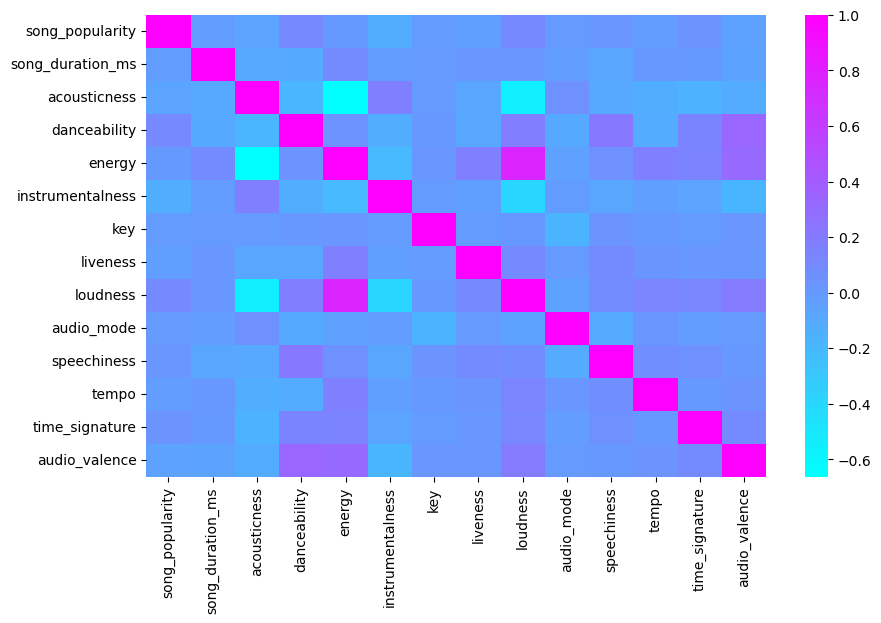

In [46]:
sns.heatmap(song_data.corr(), cmap='cool')

👩‍💻
- 데이터의 특징에서 '다중공선성'의 문제가 발생하고 있으므로.. 높은 상관관계를 보이는 변수가 어떤 것인지 먼저 확인
- 여러 변수 간의 관계를 볼 수 있음
- 여기서는 Enery와 loudness의 상관 관계가 높음

In [47]:
df = df.drop_duplicates(subset='song_name')
df = df.sort_values('song_popularity', ascending=False)

<AxesSubplot:xlabel='danceability', ylabel='song_popularity'>

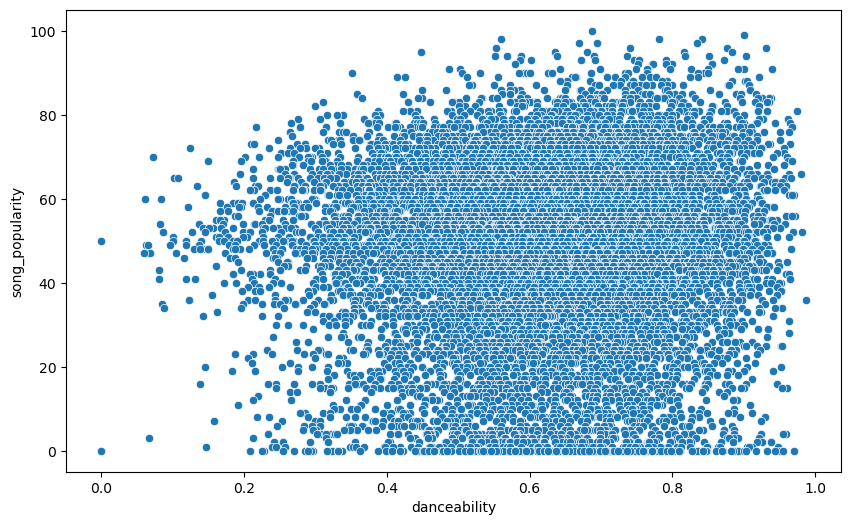

In [48]:
sns.scatterplot(x='danceability', y='song_popularity',data=df, palette='Dark2')

👩‍💻
- 산점도를 활용하여'danceability' (춤추기 좋은 정도)와 'song_popularity' (곡의 인기도) 간의 관계를 시각화
- 두 변수 사이에 양의 상관관계가 있으면, 춤추기 좋은 노래가 더 인기가 있다고 해석
- 반대로, 뚜렷한 패턴이 없으면 이 두 변수 사이에 강한 관계가 없다로 해석
- 여기서는 뚜렷한 패턴이 없기 때문에 두 변수 사이에 강한 관계는 없다고 판단

In [49]:
# 그럼 song_popularity를 결정하는 요인은 어떤 것이 있을까? 나머지 요인들을 알아보기 위한 머신러닝 모델 구축
# 단, 문자열인 song_name은 제외하고!

X = (df.drop(labels=['song_popularity', 'song_name'], axis=1)).to_numpy()
Y = (df.song_popularity).to_numpy()

In [50]:
# 'x'(특성데이터)와 'Y'(타겟 변수)를 받아들이고 데이터를 두 부분으로 나누는 과정
# X_train과 y_train은 모델 훈련에 사용되는 특성과 타겟 변수
# X_test와 y_test는 모델을 평가할 때 사용되는 특성과 타겟 변수

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train, X_test, y_train, y_test)

[[2.29240e+05 3.68000e-01 5.83000e-01 ... 7.40080e+01 4.00000e+00
  3.88000e-01]
 [2.17644e+05 2.49000e-01 4.91000e-01 ... 1.61986e+02 3.00000e+00
  2.65000e-01]
 [1.72906e+05 8.08000e-01 6.83000e-01 ... 1.13424e+02 4.00000e+00
  6.45000e-01]
 ...
 [2.87920e+05 3.86000e-02 8.31000e-01 ... 9.39980e+01 4.00000e+00
  9.60000e-01]
 [1.74335e+05 3.71000e-01 9.00000e-01 ... 9.99640e+01 4.00000e+00
  4.88000e-01]
 [1.56000e+05 1.75000e-01 7.68000e-01 ... 1.19981e+02 4.00000e+00
  6.39000e-01]] [[2.12715e+05 6.73000e-01 3.81000e-01 ... 7.59880e+01 4.00000e+00
  4.38000e-01]
 [4.17188e+05 2.88000e-04 5.88000e-01 ... 1.35993e+02 4.00000e+00
  1.69000e-01]
 [1.88041e+05 3.08000e-04 2.85000e-01 ... 9.29850e+01 4.00000e+00
  5.75000e-01]
 ...
 [3.61750e+05 6.18000e-03 8.22000e-01 ... 1.25008e+02 4.00000e+00
  7.60000e-01]
 [1.57640e+05 6.29000e-01 5.78000e-01 ... 1.16128e+02 4.00000e+00
  8.08000e-01]
 [2.46600e+05 3.65000e-01 8.13000e-01 ... 9.29990e+01 4.00000e+00
  9.00000e-01]] [72 47 22 ... 55

In [51]:
# 회귀 분석에 사용되는 수많은 ML모델들!
import pandas as pd

# 모델 설명을 데이터프레임으로 만들기
model_descriptions = {
    "Model": [
        "Linear Regression", "Ridge Regression", "Lasso Regression", 
        "Elastic Net", "Support Vector Machine (SVM) Regression", 
        "Gradient Boosting", "XGBoost, LightGBM, CatBoost"
    ],
    "Description": [
        "가장 기본적인 회귀 모델로, 데이터가 선형 관계를 갖는다고 가정합니다. 데이터가 간단하고 선형적인 패턴을 보일 때 효과적입니다.",
        "선형 회귀의 확장으로, L2 정규화를 통해 과적합을 줄이는 데 도움을 줍니다. 변수들이 서로 상관관계가 높을 때 유용합니다.",
        "L1 정규화를 사용하는 선형 회귀의 또 다른 형태입니다. 불필요한 특성을 제거하여 모델을 단순화하는 데 도움을 줍니다.",
        "릿지와 라쏘 회귀의 특징을 결합한 모델로, 다중 공선성 문제를 다루는 데 효과적입니다.",
        "복잡한 비선형 관계를 모델링할 수 있는 강력한 알고리즘입니다. 다양한 커널 트릭을 사용하여 높은 유연성을 제공합니다.",
        "여러 개의 약한 학습기를 순차적으로 학습시켜 강한 모델을 만듭니다. 일반적으로 높은 성능을 제공하지만, 매개변수 조정이 중요합니다.",
        "그래디언트 부스팅을 기반으로 한 고급 알고리즘들로, 대규모 데이터셋에서 뛰어난 성능을 보입니다. 빠른 속도와 효율적인 메모리 사용이 특징입니다."
    ]
}

# DataFrame 생성
model_df = pd.DataFrame(model_descriptions)

model_df

,Model,Description
0,Linear Regression,"가장 기본적인 회귀 모델로, 데이터가 선형 관계를 갖는다고 가정합니다. 데이터가 간..."
1,Ridge Regression,"선형 회귀의 확장으로, L2 정규화를 통해 과적합을 줄이는 데 도움을 줍니다. 변수..."
2,Lasso Regression,L1 정규화를 사용하는 선형 회귀의 또 다른 형태입니다. 불필요한 특성을 제거하여 ...
3,Elastic Net,"릿지와 라쏘 회귀의 특징을 결합한 모델로, 다중 공선성 문제를 다루는 데 효과적입니다."
4,Support Vector Machine (SVM) Regression,복잡한 비선형 관계를 모델링할 수 있는 강력한 알고리즘입니다. 다양한 커널 트릭을 ...
5,Gradient Boosting,여러 개의 약한 학습기를 순차적으로 학습시켜 강한 모델을 만듭니다. 일반적으로 높은...
6,"XGBoost, LightGBM, CatBoost","그래디언트 부스팅을 기반으로 한 고급 알고리즘들로, 대규모 데이터셋에서 뛰어난 성능..."


In [52]:
# 랜덤포레스트를 활용하여... 회귀모델 생성

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model 
rf.fit(X_train, y_train)

# accuracy 계산
def cal_error(y_test, y_pred):
    print ("Mean Absolute Error : ", round(np.mean(abs(y_test - y_pred)), 2), 'degrees')

def cal_accuracy(y_test, y_pred):
    errors = abs(y_pred - y_test)
    mape = 100 * (errors / (y_test + (y_test==0)))
    accuracy = abs(100 - np.mean(mape))
    print("Accuracy : ", round(accuracy, 2), '%')

#그 값을 나타내는 결과표
print("Results:")
# test 지표와 pred 지표를 비교했을 때
y_pred = rf.predict(X_test)
cal_error(y_test, y_pred)
cal_accuracy(y_test, y_pred)

Results:
Mean Absolute Error :  15.65 degrees
Accuracy :  83.42 %


In [53]:
# (추가)
# 엘라스틱넷을 활용하여... 회귀모델 생성

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# 엘라스틱넷 모델 생성
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# 모델 훈련
elastic_net.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_elastic_net = elastic_net.predict(X_test)

# 성능 평가
def cal_error(y_test, y_pred):
    print ("Mean Absolute Error : ", round(np.mean(abs(y_test - y_pred)), 2), 'degrees')

def cal_accuracy(y_test, y_pred):
    errors = abs(y_pred - y_test)
    mape = 100 * (errors / (y_test + (y_test==0)))
    accuracy = abs(100 - np.mean(mape))
    print("Accuracy : ", round(accuracy, 2), '%')

# test 지표와 pred 지표를 비교했을 때
print("Elastic Net Results:")
cal_error(y_test, y_pred_elastic_net)
cal_accuracy(y_test, y_pred_elastic_net)

Elastic Net Results:
Mean Absolute Error :  16.12 degrees
Accuracy :  89.07 %


=> 추가로 진행한 elastic_net모델이 더 좋게 나왔네요. 엘라스틱 쓰겠습니다...👀

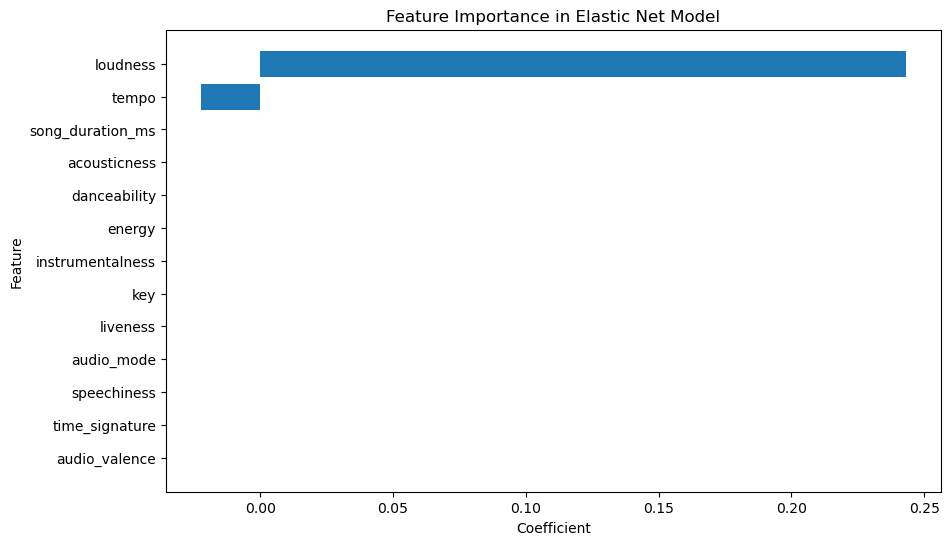

In [54]:
import matplotlib.pyplot as plt

# 모델 계수 추출
coefficients = elastic_net.coef_

# 특성 이름과 함께 계수를 DataFrame으로 변환
feature_names = df.drop(['song_popularity', 'song_name'], axis=1).columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 계수의 절대값에 따라 정렬
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# 계수 시각화
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance in Elastic Net Model')
plt.gca().invert_yaxis()  # 상위 특성을 위로 올림
plt.show()


👩‍💻 
- 어떤 특성이 'Song Popularity' 예측에 중요한 역할을 하는지를 나타냄
- 여기서는 loudness가 인기요인에 영향 있다는 것을 나타냄
- 동시에 음인지 양인지에 따라 어떤 의미 인지 알 수 있는데, 여기서는 막대 그래프에서 각 막대의 길이는 계수의 절대값을 나타내며, 막대가 오른쪽으로 향하면 양수, 왼쪽으로 향하면 음수를 의미

# 결론
song_popularity는 곡의 음량이 높을 수록(loudness) 트랙의 템포(temop)가 느릴 수록 인기가 많아진다 

# 🥇 최고의 모델로 뽑힌 코드
https://www.kaggle.com/code/yasserh/song-popularity-prediction-best-ml-models 